In [8]:
from sklearn import datasets
from keras.utils import np_utils
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.DESCR) # 中⾝を⾒れる

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [9]:
X = iris.data
Y = iris.target
# 数値を位置に変換[0,1,2]=>[[1,0,0],[0,1,0],[0,0,1]]
T = np_utils.to_categorical(Y)

In [5]:
print(X)
print(T)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [40]:
model = Sequential()
model.add(Dense(units=2, input_dim=4)) # Dense=全結合層
model.add(Activation('sigmoid'))
model.add(Dense(units=3))
model.add(Activation('sigmoid')) # 活性化関数

# 訓練プロセスの作成: 勾配法=SGD、損失関数=binary_crossentropy、評価関数：-）
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.1))
# モデルの概要を表示
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 10        
_________________________________________________________________
activation_10 (Activation)   (None, 2)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 9         
_________________________________________________________________
activation_11 (Activation)   (None, 3)                 0         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [41]:
l = model.layers[0]
print (l.get_weights())

[array([[-0.2039473 ,  0.39036965],
       [-0.76833344,  0.8975029 ],
       [-0.64042425, -0.1480341 ],
       [-0.1716907 , -0.8883383 ]], dtype=float32), array([0., 0.], dtype=float32)]


In [42]:
# 第1引数、第2引数: 入力データ
# batch_size: バッチサイズ。
# epochs: 訓練を行う回数を指定します。
# verbose: 指定する数値により実行ログの出す内容が変わります。
# validation_data: 評価用のデータを指定します。
# 戻り値・・・訓練の損失値と評価関数値が返ってきます。

history = model.fit(X, T, epochs=100, batch_size=1)

Epoch 1/100
150/150 [==============================] - 0s 881us/step - loss: 1.0431
Epoch 2/100
150/150 [==============================] - 0s 863us/step - loss: 0.8902
Epoch 3/100
150/150 [==============================] - 0s 836us/step - loss: 0.7300
Epoch 4/100
150/150 [==============================] - 0s 740us/step - loss: 0.6066
Epoch 5/100
150/150 [==============================] - 0s 713us/step - loss: 0.5523
Epoch 6/100
150/150 [==============================] - 0s 752us/step - loss: 0.4902
Epoch 7/100
150/150 [==============================] - 0s 717us/step - loss: 0.4781
Epoch 8/100
150/150 [==============================] - 0s 755us/step - loss: 0.4467
Epoch 9/100
150/150 [==============================] - 0s 721us/step - loss: 0.4225
Epoch 10/100
150/150 [==============================] - 0s 783us/step - loss: 0.3859
Epoch 11/100
150/150 [==============================] - 0s 797us/step - loss: 0.3539
Epoch 12/100
150/150 [==============================] - 0s 810us/step - lo

In [43]:
history

In [44]:
print (model.layers[0].get_weights())

[array([[  7.0496716 ,   0.41408324],
       [  6.652247  ,   2.2156246 ],
       [-10.775167  ,  -2.9852052 ],
       [-10.77583   ,  -2.1086018 ]], dtype=float32), array([6.1138163 , 0.22729965], dtype=float32)]


In [46]:
# 学習したモデルにXを与えた際の結果
Y2 = model.predict_classes(X, batch_size=1)

print (Y2)
print (Y==Y2)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
 False  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True 

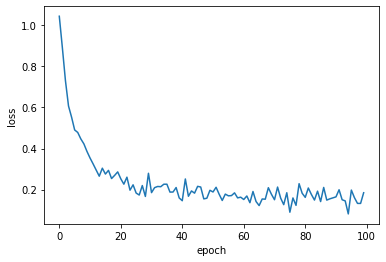

In [47]:
# 学習過程(loss)の可視化
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim(0.5,1)
plt.show()
